<a href="https://colab.research.google.com/github/AndrewPolyak/PyTorch-Self-Learning/blob/main/CIFAR_10_CNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 CNN Classifier

*By Andrew Polyak*

This mini-project is designed to help me understand the key steps involved in deep learning with CNNs and give me additional practical experience using PyTorch.

The goal of this project is to build a simple Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset using PyTorch and torchvision.



## 1. Initialize the Environment

In [117]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [118]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Currently using {device}")

Currently using cuda


## 2. Load and Pre-Process the Data

In [119]:
transforms_original = transforms.Compose([
    transforms.ToTensor(),
])

transforms_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(size=32, padding=4),
    transforms.ToTensor()
])

In [120]:
train_original_data = CIFAR10(root="data",
                              train=True,
                              transform=transforms_original,
                              target_transform=None,
                              download=True)
train_augmented_data1 = CIFAR10(root="data",
                               train=True,
                               transform=transforms_augmented,
                               target_transform=None,
                               download=True)

In [121]:
train_data = torch.utils.data.ConcatDataset([train_original_data, train_augmented_data1])
test_data = CIFAR10(root="data",
                     train=False,
                     transform=transforms_original,
                     target_transform=None,
                     download=True)
print(f"Training data: {train_data.datasets}\n\nTesting data: {test_data}")

Training data: [Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           ), Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               RandomCrop(size=(32, 32), padding=4)
               ToTensor()
           )]

Testing data: Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [122]:
num_classes = len(test_data.classes)
classes = test_data.classes
print(f"Dataset has {num_classes} classes: {classes}")

Dataset has 10 classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [123]:
torch.manual_seed(42)

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

## 3. Explore and Visualize the Data

In [124]:
X, y = train_data[0]
print(f"Example feature: {X}\n\nExample label: {y}")

Example feature: tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0

In [125]:
print(f"Shape of features: {X.shape} --> ([Colour channels (RGB), height, width])\nShape of labels: {y}")

Shape of features: torch.Size([3, 32, 32]) --> ([Colour channels (RGB), height, width])
Shape of labels: 6


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

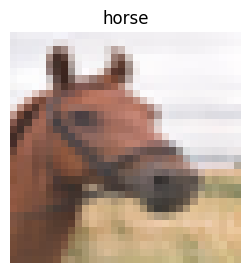

In [126]:
X, y = test_data[99]

plt.figure(figsize=(3,3))
plt.imshow(X.permute(1, 2, 0))
plt.title(classes[y])
plt.axis(False)

## 4. Build the CNN Model

In [127]:
class CIFARCNN(nn.Module):
  def __init__(self, in_dim, hid_dim, out_dim):
    super().__init__()
    self.stack1 = nn.Sequential(
        nn.Conv2d(in_channels=in_dim,
                  out_channels=hid_dim,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(hid_dim),
        nn.ReLU(),
        nn.Conv2d(in_channels=hid_dim,
                  out_channels=hid_dim,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(hid_dim),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     padding=1),
        nn.Dropout(0.2)
    )
    self.stack2 = nn.Sequential(
        nn.Conv2d(in_channels=hid_dim,
                  out_channels=hid_dim,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(hid_dim),
        nn.ReLU(),
        nn.Conv2d(in_channels=hid_dim,
                  out_channels=hid_dim,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.BatchNorm2d(hid_dim),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     padding=1),
        nn.Dropout(0.3)
    )
    self.stack3 = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10368,
                  out_features=out_dim)
    )

  def forward(self, x):
    return self.stack3(self.stack2(self.stack1(x)))

In [128]:
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

IN_DIM = 3
HID_DIM = 128
OUT_DIM = 10

model = CIFARCNN(in_dim=IN_DIM,
                 hid_dim=HID_DIM,
                 out_dim=OUT_DIM).to(device)
print(model)

CIFARCNN(
  (stack1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.2, inplace=False)
  )
  (stack2): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
 

## 5. Set Up the Loss Function and Optimizer

In [129]:
import torch.optim.lr_scheduler as lr_scheduler

LEARNING_RATE = 0.01

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                             lr=LEARNING_RATE,
                             weight_decay=1e-4)

lambda1 = lambda epoch: epoch / 5
scheduler = lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda1)

## 6. Train the Model

In [130]:
!pip install torchmetrics

In [131]:
import torchmetrics
from torchmetrics import Accuracy

In [132]:
def train_batch(model: nn.Module,
                loss_fn: nn.Module,
                optimizer: torch.optim.SGD,
                dataloader: DataLoader):

  accuracy_fn = Accuracy(task="multiclass",
                         num_classes=10).to(device)

  avg_loss, avg_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    avg_loss += loss

    acc = accuracy_fn(y_pred, y)
    avg_acc += acc

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  avg_loss = avg_loss / len(dataloader)
  avg_acc = avg_acc / len(dataloader)

  print(f"Average Training Loss: {avg_loss:.5f}  |  Average Training Accuracy: {(avg_acc * 100):.5f}%")


In [133]:
def test_batch(model: nn.Module,
               loss_fn: nn.Module,
               dataloader: DataLoader):

  accuracy_fn = Accuracy(task="multiclass",
                         num_classes=10).to(device)

  avg_loss, avg_acc = 0, 0

  model.eval()
  with torch.inference_mode():

    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss = loss_fn(y_pred, y)
      avg_loss += loss

      acc = accuracy_fn(y_pred, y)
      avg_acc += acc

    avg_loss = avg_loss / len(dataloader)
    avg_acc = avg_acc / len(dataloader)

  print(f"Average Testing Loss: {avg_loss:.5f}   |  Average Testing Accuracy: {(avg_acc * 100):.5f}%\n")

In [134]:
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)

EPOCHS = 20

for epoch in range(EPOCHS):
  print(f"\nEpoch: {epoch+1}\n---------------")
  train_batch(model=model,
              loss_fn=loss_fn,
              optimizer=optimizer,
              dataloader=train_dataloader)
  test_batch(model=model,
             loss_fn=loss_fn,
             dataloader=test_dataloader)
  scheduler.step()


Epoch: 1
---------------
Average Training Loss: 2.70131  |  Average Training Accuracy: 10.19100%
Average Testing Loss: 2.50141   |  Average Testing Accuracy: 10.72284%


Epoch: 2
---------------
Average Training Loss: 1.31355  |  Average Training Accuracy: 53.19300%
Average Testing Loss: 0.95874   |  Average Testing Accuracy: 66.20407%


Epoch: 3
---------------
Average Training Loss: 0.96916  |  Average Training Accuracy: 66.00200%
Average Testing Loss: 0.73302   |  Average Testing Accuracy: 75.16972%


Epoch: 4
---------------
Average Training Loss: 0.80179  |  Average Training Accuracy: 72.10800%
Average Testing Loss: 0.67679   |  Average Testing Accuracy: 77.00679%


Epoch: 5
---------------
Average Training Loss: 0.71109  |  Average Training Accuracy: 75.32000%
Average Testing Loss: 0.65784   |  Average Testing Accuracy: 77.75558%


Epoch: 6
---------------
Average Training Loss: 0.65395  |  Average Training Accuracy: 77.30600%
Average Testing Loss: 0.57040   |  Average Testing A

## 7. Save and Load the Model

In [135]:
from pathlib import Path

In [136]:
FOLDER = Path("saved_models")
FOLDER.mkdir(parents=True,
             exist_ok=True)

SAVE_PATH = FOLDER / "model_85_acc.pth"
SAVE_PATH

PosixPath('saved_models/model_85_acc.pth')

In [137]:
torch.save(obj=model.state_dict(),
           f=SAVE_PATH)

In [141]:
new_model = CIFARCNN(in_dim=IN_DIM,
                 hid_dim=HID_DIM,
                 out_dim=OUT_DIM).to(device)

In [142]:
new_model.load_state_dict(torch.load(f=SAVE_PATH))

<All keys matched successfully>

## 8. Visualize Predictions

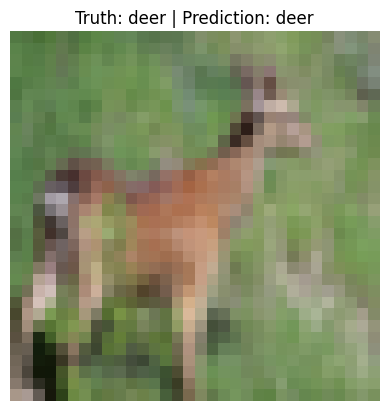

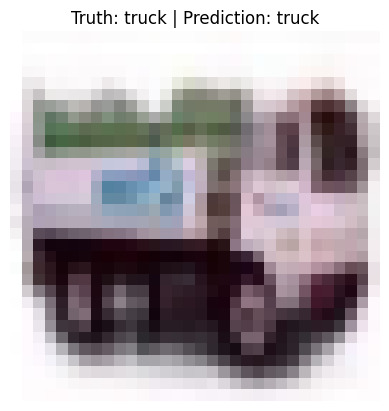

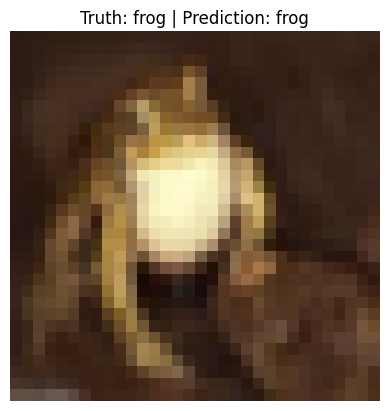

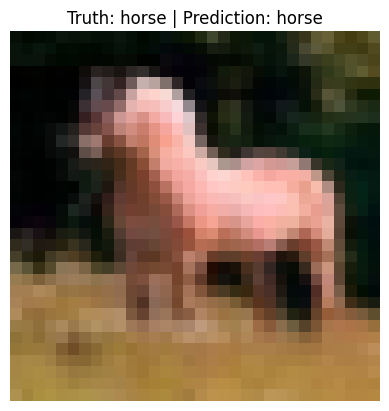

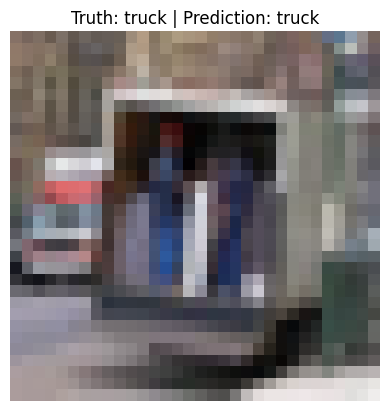

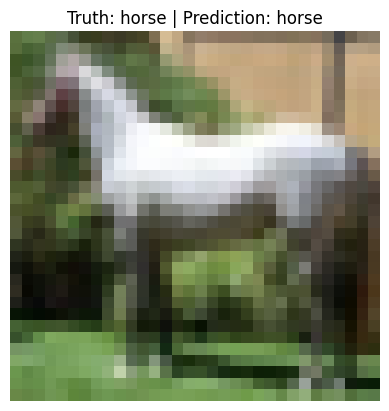

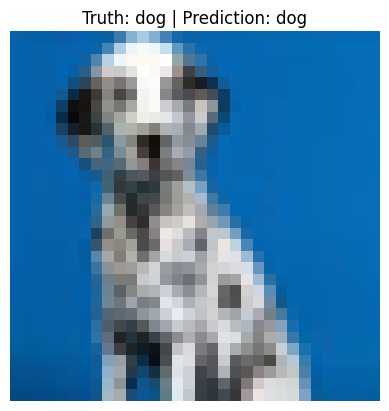

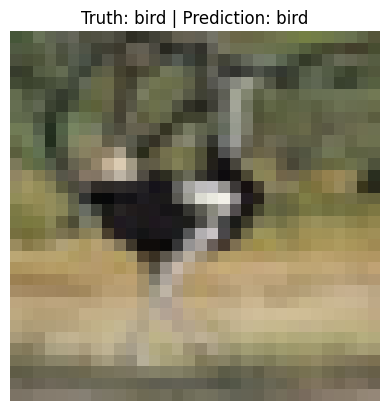

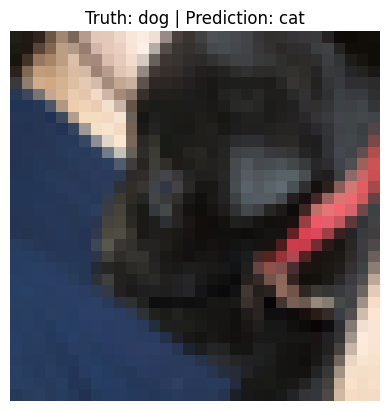

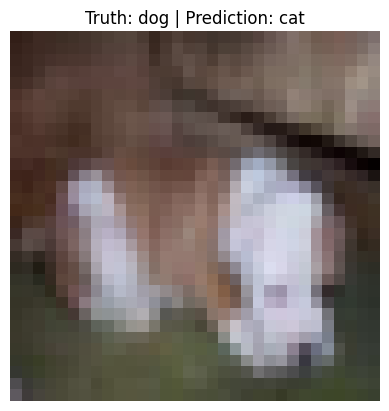

In [152]:
new_model.eval()
with torch.inference_mode():
  for i in range(10):
    X, y = next(iter(test_dataloader))
    X, y = X.to(device), y.to(device)

    y_pred = new_model(X)
    class_index = torch.argmax(y_pred, dim=1)

    X = X[0].permute(1, 2, 0).cpu()

    plt.figure()
    plt.imshow(X)
    plt.axis(False)
    plt.title(f"Truth: {classes[y[0]]} | Prediction: {classes[class_index[0]]}")